In [3]:
import pandas as pd
import matplotlib.pyplot as plt
accepted_df = pd.read_csv('accepted_2007_to_2018Q4.csv')
drop_columns = ['member_id','desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','il_util','mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','url']
accepted_df.drop(drop_columns, axis=1, inplace=True)
accepted_df.dropna(inplace=True)
low = 0.05
high = 0.95


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


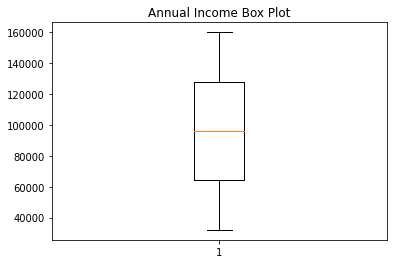

In [4]:
plt.title("Annual Income Box Plot")
plt.boxplot(accepted_df['annual_inc'].quantile([low, high]))
plt.show()


Above, we see a box plot of annual income grouped into quartiles with outliers removed. I removed the top and bottom 5% because there are significant outliers that skew the results, particularly on the upper bounds. We see that the mean approval income is 100,000 with the upper quartile in the range of 120,000-160,000. The quartiles are relatively evenly spaced out.

In [5]:
accepted_df['annual_inc'].describe()

count    1.653600e+04
mean     8.069633e+04
std      5.702182e+04
min      9.600000e+03
25%      5.000000e+04
50%      7.000000e+04
75%      9.723550e+04
max      2.500000e+06
Name: annual_inc, dtype: float64

Above, we look at a description of the row validating what we saw in the above group but with one new addition: the max. The max is very large compared to the rest of the incomes meaning there is at least one major outlier.

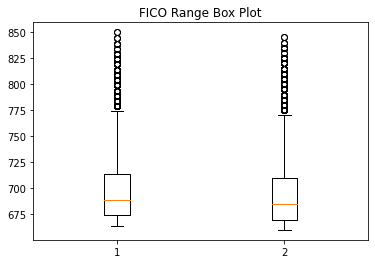

In [6]:
plt.title("FICO Range Box Plot")
plt.boxplot([accepted_df['fico_range_high'], accepted_df['fico_range_low']])
plt.show()


We look at a box plot of the ranges of FICO scores, with high on the left and low on the right. We see little difference telling us that those approved for loans have consistently good FICO scores.

In [8]:
accepted_df['fico_range_high'].describe()

count    16536.000000
mean       698.343674
std         30.599250
min        664.000000
25%        674.000000
50%        689.000000
75%        714.000000
max        850.000000
Name: fico_range_high, dtype: float64

In [9]:
accepted_df['fico_range_low'].describe()

count    16536.000000
mean       694.343553
std         30.598653
min        660.000000
25%        670.000000
50%        685.000000
75%        710.000000
max        845.000000
Name: fico_range_low, dtype: float64

Looking at a description of the two columns we are comparing validates what we saw in the graph. We see. similar mean and standard deviation telling us that the distribution for the two is very similar. Going through the four quartiles tells a similar story. 

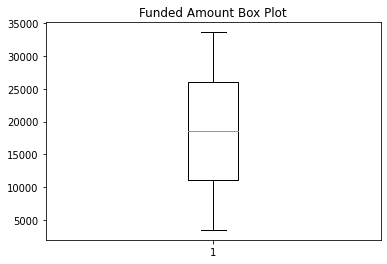

In [10]:
plt.title("Funded Amount Box Plot")
plt.boxplot(accepted_df['funded_amnt'].quantile([low, high]))
plt.show()

Above we have a box plot of the funded amount for loans in the dataset with outliers removed. Similar to the annual income box, we see the quartiles are relatively evenly spaced out with a mean around 20,000. 

In [11]:
accepted_df['funded_amnt'].describe()

count    16536.000000
mean     15280.819122
std       8741.944785
min       1000.000000
25%       8100.000000
50%      14000.000000
75%      20400.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In the description above we see something that we have outliers on the lower end of the spectrum, unlike annual income. The minimum loan is for 1,000 and 25 percentile is at 8,100, significantly lower than the 25 percentile value of over 12,000 in the plot above. This repeats for all percentiles and we notice a higher disparity in the 50 and 75 percentiles. 